In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [5]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
wine_labels

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [8]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [9]:
# 1 point
def scale(X):
    # Значиение минус среднее mean делить на отклонение std для каждой колонки
    # your code here
    for i in X.columns:
        X[i] = (X[i]-np.mean(X[i]))/(np.std(X[i]))
    return X

In [10]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4260\3280510576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[i]-np.mean(X[i]))/(np.std(X[i]))


### Pipeline Version (2 points)

In [11]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        # your code here
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std    
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self
    def transform(self, X, y=None, copy=None):
        for i in X.columns:
            X[i] = (X[i]-np.mean(X[i]))/(np.std(X[i]))
        return X
        

In [12]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4260\1526968756.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[i]-np.mean(X[i]))/(np.std(X[i]))


## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [13]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[  3.45762814,  -0.22938803],
       [-10.93319982,   0.11954566],
       [  8.97895289,  -0.99630953],
       ...,
       [ -0.27101078,   5.83784316],
       [ 20.70970588,   6.10709254],
       [  5.20961009,   6.18065322]])

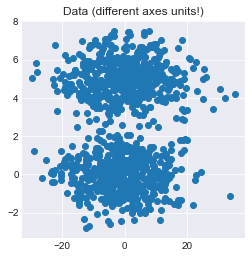

In [14]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

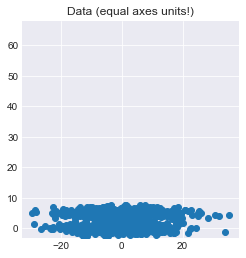

In [15]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

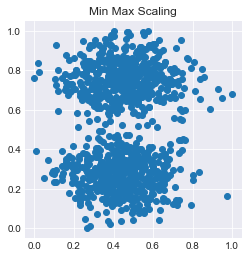

In [16]:
## your code
data1 = MinMaxScaler().fit_transform(data)
plot_scatter(data1[:, 0], data1[:, 1], auto_scaled=False , title='Min Max Scaling')

### StandardScaler (0.5 point)

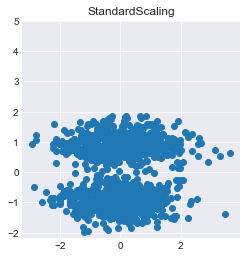

In [17]:
## your code
data1 = StandardScaler().fit_transform(data)
plot_scatter(data1[:, 0], data1[:, 1], auto_scaled=False , title='StandardScaling')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


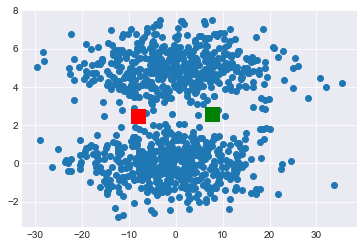

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [18]:
## your code
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(data)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.title = 'Not scaling'
plt.show()
Kmean.labels_

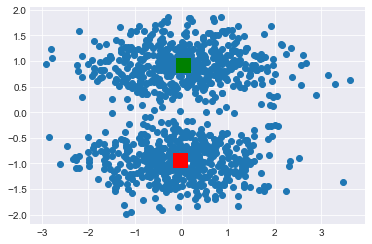

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
Kmean.fit(data1)
Kmean.cluster_centers_
plt.scatter(data1[:, 0], data1[:, 1])
plt.title = 'Scaling'
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.show()
Kmean.labels_

In [20]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

## Exercise  3 - Preprocessing Pipeline (2 points)

In [21]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [22]:
## your code
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(wine_train, wine_labels_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [23]:
pred = logreg.predict(wine_val)
logreg.score(wine_val, wine_labels_val)

0.9814814814814815

In [24]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(StandardScaler().fit_transform(wine_train), wine_labels_train)
pred = logreg.predict(StandardScaler().fit_transform(wine_val))
logreg.score(StandardScaler().fit_transform(wine_val), wine_labels_val)

0.9814814814814815

In [25]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [26]:
from sklearn.feature_selection import SelectKBest, chi2

wine_data_new = SelectKBest(chi2, k=5).fit_transform(wine_data, wine_labels)



In [27]:
wine_data_new.shape

(178, 5)

In [28]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data_new, wine_labels, 
                                                                            test_size=0.3, random_state=42)

In [29]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(StandardScaler().fit_transform(wine_train), wine_labels_train)
pred = logreg.predict(StandardScaler().fit_transform(wine_val))
logreg.score(StandardScaler().fit_transform(wine_val), wine_labels_val)

0.9814814814814815

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [30]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

<AxesSubplot:>

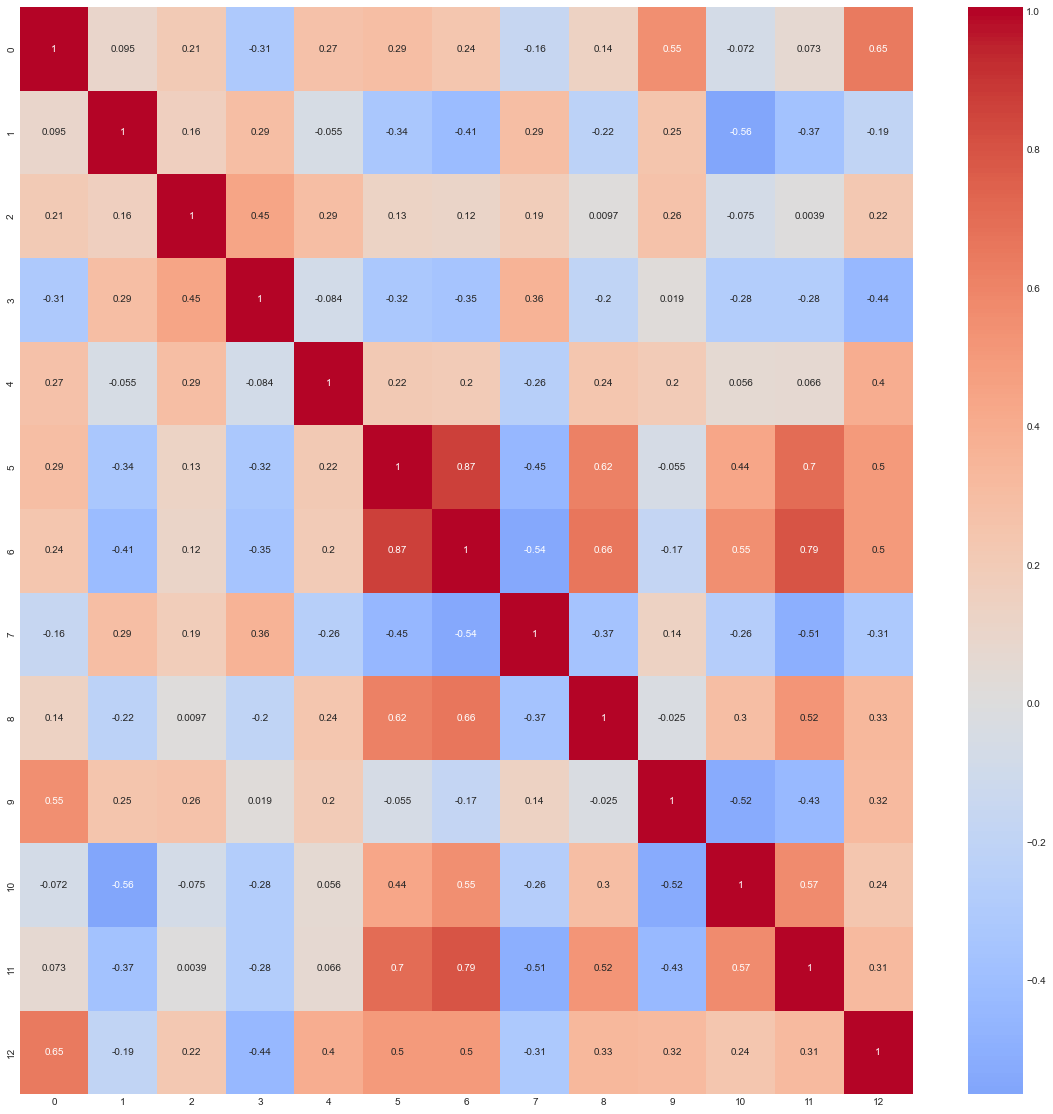

In [31]:
## your code
wine_data_s = pd.DataFrame(StandardScaler().fit_transform(wine_data))
S = wine_data_s.cov()
plt.figure(figsize=(20,20))
sns.heatmap(S, center = 0, cmap = 'coolwarm', annot = True)

If your code is correct, the following assert should be Ok.

In [32]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [33]:
np.linalg.norm(S)

5.787241159764733

In [34]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return -(x.T@S@x)
    
def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds
    return np.linalg.norm(x) - 1
 
    
con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.ones(13)# your code: initial vector to start optimization

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x

In [35]:
x0

array([ 0.14445525, -0.24524975, -0.00236688, -0.2394557 ,  0.14186934,
        0.3948552 ,  0.4226941 , -0.2982966 ,  0.313267  , -0.08799891,
        0.29698327,  0.37636207,  0.28674809])

Hurray! We have first vector! Let's do another one.

In [36]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
    return -x.T@x0

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.zeros(13) # your code: initial vector to start optimization


sol = minimize(objective, 
               x1, 
               constraints = [con2] + [con1]#your code
              )

x1 = sol.x

In [37]:
x1

array([ 0.48363249,  0.22496693,  0.31608577, -0.01054527,  0.29960525,
        0.06499005, -0.00341976,  0.02882484,  0.0392514 ,  0.52999789,
       -0.27927934, -0.1645487 ,  0.36486552])

In [38]:
x1@S@x1

2.5110809895757322

In [39]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

If your solution is correct, the following asserts should be Ok.

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

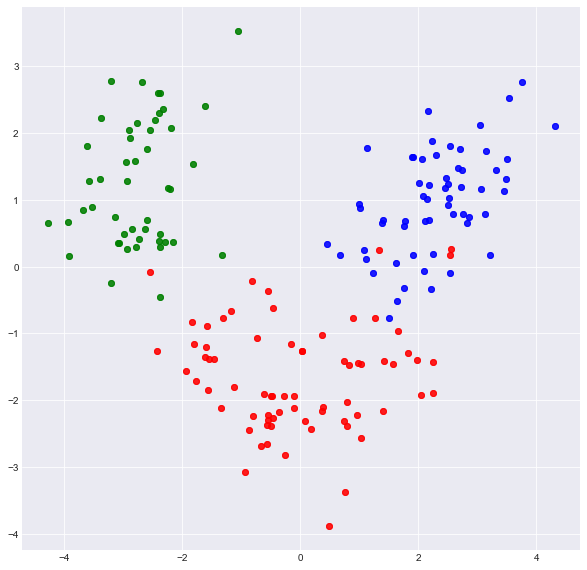

In [40]:
pca = PCA(n_components=2)

v0 = wine_data_s.dot(x0)
v1 = wine_data_s.dot(x1)

wine_data_pca = pca.fit_transform(wine_data)
wine_data_scaled_pca = pca.fit_transform(wine_data_s)


plt.figure(figsize=(10,10))
for l, c in zip(range(0, 3), ('blue', 'red', 'green')):
    plt.scatter(v0[wine_labels == 0], v1[wine_labels == 0] , color = 'blue', label=f'class {l}',
                 alpha=0.5)

for l, c in zip(range(0, 3), ('blue', 'red', 'green')):
    plt.scatter(v0[wine_labels == 1], v1[wine_labels == 1] , color = 'red', label=f'class {l}',
                 alpha=0.5)

for l, c in zip(range(0, 3), ('blue', 'red', 'green')):
    plt.scatter(v0[wine_labels == 2], v1[wine_labels == 2] , color = 'green', label=f'class {l}',
                 alpha=0.5)



"Повернутый" график более нагляден, чем исходный

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [41]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

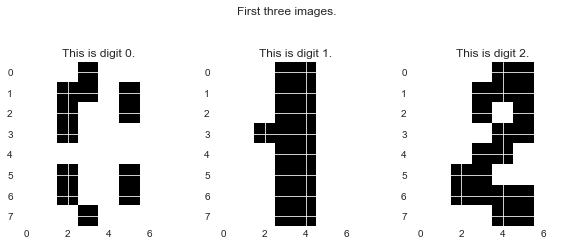

In [42]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [45]:
clf = RandomForestClassifier(max_depth=13)

# your code here
clf.fit(X_train, y_train)
acc = clf.score(X_val, y_val)
print(acc)

0.9938271604938271


In [46]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [47]:
# ! pip install boruta

In [48]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

# your code here: do run the boruta
feat_selector.fit(np.array(X_train), np.array(y_train))


BorutaPy(estimator=RandomForestClassifier(max_depth=13, n_estimators=62,
                                          random_state=RandomState(MT19937) at 0x146911C8),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x146911C8)

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

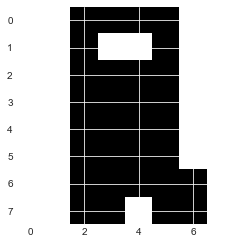

In [57]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [58]:
feature_ranks = list(zip(X_train.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results



In [51]:
cols = []
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2] == True or feat[1] < 4:
        cols.append(feat[0])

Feature: pixel_0_0                 Rank: 25,  Keep: False
Feature: pixel_0_1                 Rank: 25,  Keep: False
Feature: pixel_0_2                 Rank: 1,  Keep: True
Feature: pixel_0_3                 Rank: 1,  Keep: True
Feature: pixel_0_4                 Rank: 1,  Keep: True
Feature: pixel_0_5                 Rank: 1,  Keep: True
Feature: pixel_0_6                 Rank: 25,  Keep: False
Feature: pixel_0_7                 Rank: 25,  Keep: False
Feature: pixel_1_0                 Rank: 25,  Keep: False
Feature: pixel_1_1                 Rank: 8,  Keep: False
Feature: pixel_1_2                 Rank: 1,  Keep: True
Feature: pixel_1_3                 Rank: 4,  Keep: False
Feature: pixel_1_4                 Rank: 2,  Keep: False
Feature: pixel_1_5                 Rank: 1,  Keep: True
Feature: pixel_1_6                 Rank: 13,  Keep: False
Feature: pixel_1_7                 Rank: 25,  Keep: False
Feature: pixel_2_0                 Rank: 25,  Keep: False
Feature: pixel_2_1           

In [59]:
print(cols)

['pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_1_2', 'pixel_1_4', 'pixel_1_5', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6']


In [60]:
clf = RandomForestClassifier(max_depth=13)

# your code here
clf.fit(X_train[cols], y_train)
acc = clf.score(X_val[cols], y_val)

print(acc)

0.9938271604938271


In [61]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market